<h1>目录<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# AdaBoostClassifier实战

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

接着我们生成一些随机数据,生成2维正态分布，生成的数据按分位数分为两类，500个样本,2个样本特征，协方差系数为2

In [2]:
X1, y1 = make_gaussian_quantiles(cov=2.0,n_samples=500, n_features=2,n_classes=2, random_state=1)



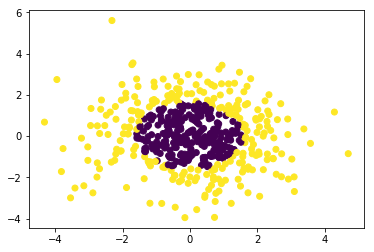

In [3]:
plt.scatter(X1[:,0] , X1[:,1] , c = y1 )

In [4]:
plt.scatter(X2[:,0] , X2[:,1] , c = y2 )

NameError: name 'X2' is not defined

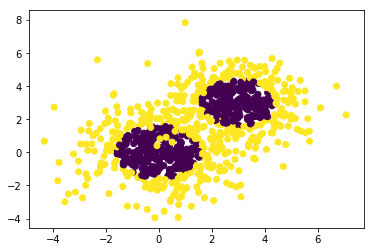

In [21]:
plt.scatter(X1[:,0] , X1[:,1] , c = y1 )
plt.scatter(X2[:,0] , X2[:,1] , c = y2 )

In [24]:
- y2 + 1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,

In [3]:
X1

array([[ 2.69359418e+00,  1.57127145e+00],
       [-1.34129623e+00, -5.98888751e-01],
       [-1.14388268e+00,  7.88338434e-01],
       [-6.77630468e-01,  4.95211145e-01],
       [ 1.72281294e-01,  1.59733146e+00],
       [-1.48979921e-01,  8.91231264e-01],
       [ 9.58564660e-01, -1.56493064e+00],
       [ 5.18071703e-01, -1.47727247e+00],
       [ 1.39488860e+00,  3.01982539e-01],
       [-5.00177990e-02,  2.98484629e+00],
       [-1.94188114e+00,  4.45702687e-01],
       [ 6.93758081e-01, -1.97322818e+00],
       [ 8.57584682e-01,  3.24380656e+00],
       [-9.80455831e-02, -1.53289531e-01],
       [ 5.90154155e-01,  1.10983330e+00],
       [ 1.46152014e+00, -2.06861649e-01],
       [ 1.06255131e+00,  1.98549130e-01],
       [ 4.94176980e-02,  2.05614996e+00],
       [-5.20680292e-02,  1.58913041e-01],
       [-8.42993379e-01,  1.21851908e+00],
       [ 6.52184525e-01, -1.66309064e+00],
       [ 2.00309969e-01, -3.55859105e+00],
       [-8.50164101e-01,  7.86406700e-01],
       [-2.

In [7]:
X2

array([[ 2.55589271,  1.18106225],
       [ 4.59976918,  2.25951561],
       [ 4.35777269,  2.13910184],
       [ 1.23529448,  4.50919563],
       [ 2.03147181,  4.4987475 ],
       [ 1.08237023,  4.24167387],
       [ 2.49584705,  4.56587071],
       [ 5.13694926,  2.06771575],
       [ 0.89418044,  3.06995865],
       [ 2.1786098 ,  3.46241931],
       [ 4.30921751,  3.0494447 ],
       [ 0.67878153,  3.10989528],
       [ 1.3493318 ,  4.8012811 ],
       [ 1.53120263,  4.05737775],
       [ 1.23132902,  2.38215802],
       [ 4.50050334,  1.70967485],
       [ 2.68281208,  3.23183587],
       [ 2.01263737,  3.06008806],
       [ 2.84949083,  1.85392118],
       [ 2.13552546,  4.46073614],
       [ 2.66215895,  4.50515705],
       [ 2.38276049,  3.02199139],
       [ 3.80169368,  2.93730721],
       [ 1.63632484,  2.91743992],
       [ 4.48005069,  4.36645006],
       [ 4.0849106 ,  3.23253208],
       [ 1.65626582,  4.02711361],
       [ 1.3182816 ,  3.38598985],
       [ 4.0667158 ,

In [4]:
y1

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,

In [14]:
- y2 + 1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,

In [5]:
# 生成2维正态分布，生成的数据按分位数分为两类，400个样本,2个样本特征均值都为3，协方差系数为2
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,n_samples=400, n_features=2, n_classes=2, random_state=1)



In [9]:
X1.shape

(500, 2)

In [10]:
X2.shape

(400, 2)

In [12]:
X = np.concatenate((X1,X2),axis = 0)

In [ ]:
y = np.concatenate()

In [6]:
#讲两组数据合成一组数据
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1)) # 对第二簇数据的分类标签进行调换

我们通过可视化看看我们的分类数据，它有两个特征，两个输出类别，用颜色区别。 

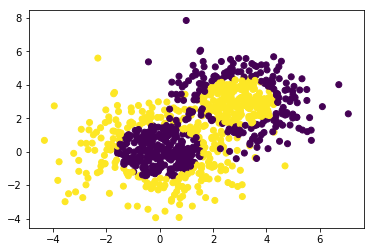

In [7]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

可以看到数据有些混杂，我们现在用基于决策树的Adaboost来做分类拟合。 

In [27]:
X1

array([[ 2.69359418e+00,  1.57127145e+00],
       [-1.34129623e+00, -5.98888751e-01],
       [-1.14388268e+00,  7.88338434e-01],
       [-6.77630468e-01,  4.95211145e-01],
       [ 1.72281294e-01,  1.59733146e+00],
       [-1.48979921e-01,  8.91231264e-01],
       [ 9.58564660e-01, -1.56493064e+00],
       [ 5.18071703e-01, -1.47727247e+00],
       [ 1.39488860e+00,  3.01982539e-01],
       [-5.00177990e-02,  2.98484629e+00],
       [-1.94188114e+00,  4.45702687e-01],
       [ 6.93758081e-01, -1.97322818e+00],
       [ 8.57584682e-01,  3.24380656e+00],
       [-9.80455831e-02, -1.53289531e-01],
       [ 5.90154155e-01,  1.10983330e+00],
       [ 1.46152014e+00, -2.06861649e-01],
       [ 1.06255131e+00,  1.98549130e-01],
       [ 4.94176980e-02,  2.05614996e+00],
       [-5.20680292e-02,  1.58913041e-01],
       [-8.42993379e-01,  1.21851908e+00],
       [ 6.52184525e-01, -1.66309064e+00],
       [ 2.00309969e-01, -3.55859105e+00],
       [-8.50164101e-01,  7.86406700e-01],
       [-2.

In [8]:
# 实例化基分类器
decision_tree = DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5)

In [12]:
# 实例化 adaboost分类器
ada = AdaBoostClassifier(decision_tree, algorithm='SAMME.R', n_estimators=50,learning_rate=1 )

In [33]:
ada = AdaBoostClassifier(decision_tree )

In [20]:
from sklearn.model_selection import GridSearchCV

In [35]:
params = {
    "algorithm":['SAMME.R',"SAMME"], # 2次
    "n_estimators": range(10,300,10), # 29次
    "learning_rate":[1,0.8,0.5,0.1] # 4 次    232
}

In [36]:
# 网格搜索, 第一个分类器, 第二个,参数
gs = GridSearchCV(ada,params,cv= 5 ,verbose=2)

In [37]:
gs.fit(X,y)

Fitting 5 folds for each of 232 candidates, totalling 1160 fits
[CV] algorithm=SAMME.R, learning_rate=1, n_estimators=10 .............
[CV]  algorithm=SAMME.R, learning_rate=1, n_estimators=10, total=   0.0s
[CV] algorithm=SAMME.R, learning_rate=1, n_estimators=10 .............
[CV]  algorithm=SAMME.R, learning_rate=1, n_estimators=10, total=   0.0s
[CV] algorithm=SAMME.R, learning_rate=1, n_estimators=10 .............
[CV]  algorithm=SAMME.R, learning_rate=1, n_estimators=10, total=   0.0s
[CV] algorithm=SAMME.R, learning_rate=1, n_estimators=10 .............
[CV]  algorithm=SAMME.R, learning_rate=1, n_estimators=10, total=   0.0s
[CV] algorithm=SAMME.R, learning_rate=1, n_estimators=10 .............
[CV]  algorithm=SAMME.R, learning_rate=1, n_estimators=10, total=   0.0s
[CV] algorithm=SAMME.R, learning_rate=1, n_estimators=20 .............
[CV]  algorithm=SAMME.R, learning_rate=1, n_estimators=20, total=   0.0s
[CV] algorithm=SAMME.R, learning_rate=1, n_estimators=20 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  algorithm=SAMME.R, learning_rate=1, n_estimators=20, total=   0.0s
[CV] algorithm=SAMME.R, learning_rate=1, n_estimators=20 .............
[CV]  algorithm=SAMME.R, learning_rate=1, n_estimators=20, total=   0.1s
[CV] algorithm=SAMME.R, learning_rate=1, n_estimators=20 .............
[CV]  algorithm=SAMME.R, learning_rate=1, n_estimators=20, total=   0.1s
[CV] algorithm=SAMME.R, learning_rate=1, n_estimators=20 .............
[CV]  algorithm=SAMME.R, learning_rate=1, n_estimators=20, total=   0.0s
[CV] algorithm=SAMME.R, learning_rate=1, n_estimators=30 .............
[CV]  algorithm=SAMME.R, learning_rate=1, n_estimators=30, total=   0.1s
[CV] algorithm=SAMME.R, learning_rate=1, n_estimators=30 .............
[CV]  algorithm=SAMME.R, learning_rate=1, n_estimators=30, total=   0.1s
[CV] algorithm=SAMME.R, learning_rate=1, n_estimators=30 .............
[CV]  algorithm=SAMME.R, learning_rate=1, n_estimators=30, total=   0.1s
[CV] algorithm=SAMME.R, learning_rate=1, n_estimators=30 ......

[CV]  algorithm=SAMME.R, learning_rate=1, n_estimators=130, total=   0.3s
[CV] algorithm=SAMME.R, learning_rate=1, n_estimators=130 ............
[CV]  algorithm=SAMME.R, learning_rate=1, n_estimators=130, total=   0.2s
[CV] algorithm=SAMME.R, learning_rate=1, n_estimators=140 ............
[CV]  algorithm=SAMME.R, learning_rate=1, n_estimators=140, total=   0.3s
[CV] algorithm=SAMME.R, learning_rate=1, n_estimators=140 ............
[CV]  algorithm=SAMME.R, learning_rate=1, n_estimators=140, total=   0.3s
[CV] algorithm=SAMME.R, learning_rate=1, n_estimators=140 ............
[CV]  algorithm=SAMME.R, learning_rate=1, n_estimators=140, total=   0.4s
[CV] algorithm=SAMME.R, learning_rate=1, n_estimators=140 ............
[CV]  algorithm=SAMME.R, learning_rate=1, n_estimators=140, total=   0.5s
[CV] algorithm=SAMME.R, learning_rate=1, n_estimators=140 ............
[CV]  algorithm=SAMME.R, learning_rate=1, n_estimators=140, total=   0.3s
[CV] algorithm=SAMME.R, learning_rate=1, n_estimators=15

[CV]  algorithm=SAMME.R, learning_rate=1, n_estimators=250, total=   0.4s
[CV] algorithm=SAMME.R, learning_rate=1, n_estimators=250 ............
[CV]  algorithm=SAMME.R, learning_rate=1, n_estimators=250, total=   0.4s
[CV] algorithm=SAMME.R, learning_rate=1, n_estimators=250 ............
[CV]  algorithm=SAMME.R, learning_rate=1, n_estimators=250, total=   0.5s
[CV] algorithm=SAMME.R, learning_rate=1, n_estimators=250 ............
[CV]  algorithm=SAMME.R, learning_rate=1, n_estimators=250, total=   0.5s
[CV] algorithm=SAMME.R, learning_rate=1, n_estimators=250 ............
[CV]  algorithm=SAMME.R, learning_rate=1, n_estimators=250, total=   0.5s
[CV] algorithm=SAMME.R, learning_rate=1, n_estimators=260 ............
[CV]  algorithm=SAMME.R, learning_rate=1, n_estimators=260, total=   0.8s
[CV] algorithm=SAMME.R, learning_rate=1, n_estimators=260 ............
[CV]  algorithm=SAMME.R, learning_rate=1, n_estimators=260, total=   0.4s
[CV] algorithm=SAMME.R, learning_rate=1, n_estimators=26

[CV]  algorithm=SAMME.R, learning_rate=0.8, n_estimators=70, total=   0.3s
[CV] algorithm=SAMME.R, learning_rate=0.8, n_estimators=70 ...........
[CV]  algorithm=SAMME.R, learning_rate=0.8, n_estimators=70, total=   0.2s
[CV] algorithm=SAMME.R, learning_rate=0.8, n_estimators=70 ...........
[CV]  algorithm=SAMME.R, learning_rate=0.8, n_estimators=70, total=   0.2s
[CV] algorithm=SAMME.R, learning_rate=0.8, n_estimators=80 ...........
[CV]  algorithm=SAMME.R, learning_rate=0.8, n_estimators=80, total=   0.2s
[CV] algorithm=SAMME.R, learning_rate=0.8, n_estimators=80 ...........
[CV]  algorithm=SAMME.R, learning_rate=0.8, n_estimators=80, total=   0.1s
[CV] algorithm=SAMME.R, learning_rate=0.8, n_estimators=80 ...........
[CV]  algorithm=SAMME.R, learning_rate=0.8, n_estimators=80, total=   0.1s
[CV] algorithm=SAMME.R, learning_rate=0.8, n_estimators=80 ...........
[CV]  algorithm=SAMME.R, learning_rate=0.8, n_estimators=80, total=   0.1s
[CV] algorithm=SAMME.R, learning_rate=0.8, n_esti

[CV]  algorithm=SAMME.R, learning_rate=0.8, n_estimators=180, total=   0.3s
[CV] algorithm=SAMME.R, learning_rate=0.8, n_estimators=180 ..........
[CV]  algorithm=SAMME.R, learning_rate=0.8, n_estimators=180, total=   0.8s
[CV] algorithm=SAMME.R, learning_rate=0.8, n_estimators=190 ..........
[CV]  algorithm=SAMME.R, learning_rate=0.8, n_estimators=190, total=   0.5s
[CV] algorithm=SAMME.R, learning_rate=0.8, n_estimators=190 ..........
[CV]  algorithm=SAMME.R, learning_rate=0.8, n_estimators=190, total=   0.4s
[CV] algorithm=SAMME.R, learning_rate=0.8, n_estimators=190 ..........
[CV]  algorithm=SAMME.R, learning_rate=0.8, n_estimators=190, total=   0.4s
[CV] algorithm=SAMME.R, learning_rate=0.8, n_estimators=190 ..........
[CV]  algorithm=SAMME.R, learning_rate=0.8, n_estimators=190, total=   0.4s
[CV] algorithm=SAMME.R, learning_rate=0.8, n_estimators=190 ..........
[CV]  algorithm=SAMME.R, learning_rate=0.8, n_estimators=190, total=   0.7s
[CV] algorithm=SAMME.R, learning_rate=0.8,

[CV]  algorithm=SAMME.R, learning_rate=0.8, n_estimators=290, total=   0.8s
[CV] algorithm=SAMME.R, learning_rate=0.5, n_estimators=10 ...........
[CV]  algorithm=SAMME.R, learning_rate=0.5, n_estimators=10, total=   0.0s
[CV] algorithm=SAMME.R, learning_rate=0.5, n_estimators=10 ...........
[CV]  algorithm=SAMME.R, learning_rate=0.5, n_estimators=10, total=   0.0s
[CV] algorithm=SAMME.R, learning_rate=0.5, n_estimators=10 ...........
[CV]  algorithm=SAMME.R, learning_rate=0.5, n_estimators=10, total=   0.0s
[CV] algorithm=SAMME.R, learning_rate=0.5, n_estimators=10 ...........
[CV]  algorithm=SAMME.R, learning_rate=0.5, n_estimators=10, total=   0.0s
[CV] algorithm=SAMME.R, learning_rate=0.5, n_estimators=10 ...........
[CV]  algorithm=SAMME.R, learning_rate=0.5, n_estimators=10, total=   0.0s
[CV] algorithm=SAMME.R, learning_rate=0.5, n_estimators=20 ...........
[CV]  algorithm=SAMME.R, learning_rate=0.5, n_estimators=20, total=   0.1s
[CV] algorithm=SAMME.R, learning_rate=0.5, n_est

[CV]  algorithm=SAMME.R, learning_rate=0.5, n_estimators=120, total=   0.3s
[CV] algorithm=SAMME.R, learning_rate=0.5, n_estimators=120 ..........
[CV]  algorithm=SAMME.R, learning_rate=0.5, n_estimators=120, total=   0.3s
[CV] algorithm=SAMME.R, learning_rate=0.5, n_estimators=120 ..........
[CV]  algorithm=SAMME.R, learning_rate=0.5, n_estimators=120, total=   0.2s
[CV] algorithm=SAMME.R, learning_rate=0.5, n_estimators=120 ..........
[CV]  algorithm=SAMME.R, learning_rate=0.5, n_estimators=120, total=   0.4s
[CV] algorithm=SAMME.R, learning_rate=0.5, n_estimators=130 ..........
[CV]  algorithm=SAMME.R, learning_rate=0.5, n_estimators=130, total=   0.5s
[CV] algorithm=SAMME.R, learning_rate=0.5, n_estimators=130 ..........
[CV]  algorithm=SAMME.R, learning_rate=0.5, n_estimators=130, total=   0.3s
[CV] algorithm=SAMME.R, learning_rate=0.5, n_estimators=130 ..........
[CV]  algorithm=SAMME.R, learning_rate=0.5, n_estimators=130, total=   0.3s
[CV] algorithm=SAMME.R, learning_rate=0.5,

[CV]  algorithm=SAMME.R, learning_rate=0.5, n_estimators=230, total=   0.6s
[CV] algorithm=SAMME.R, learning_rate=0.5, n_estimators=230 ..........
[CV]  algorithm=SAMME.R, learning_rate=0.5, n_estimators=230, total=   0.6s
[CV] algorithm=SAMME.R, learning_rate=0.5, n_estimators=230 ..........
[CV]  algorithm=SAMME.R, learning_rate=0.5, n_estimators=230, total=   0.7s
[CV] algorithm=SAMME.R, learning_rate=0.5, n_estimators=240 ..........
[CV]  algorithm=SAMME.R, learning_rate=0.5, n_estimators=240, total=   0.5s
[CV] algorithm=SAMME.R, learning_rate=0.5, n_estimators=240 ..........
[CV]  algorithm=SAMME.R, learning_rate=0.5, n_estimators=240, total=   0.5s
[CV] algorithm=SAMME.R, learning_rate=0.5, n_estimators=240 ..........
[CV]  algorithm=SAMME.R, learning_rate=0.5, n_estimators=240, total=   0.7s
[CV] algorithm=SAMME.R, learning_rate=0.5, n_estimators=240 ..........
[CV]  algorithm=SAMME.R, learning_rate=0.5, n_estimators=240, total=   0.5s
[CV] algorithm=SAMME.R, learning_rate=0.5,

[CV]  algorithm=SAMME.R, learning_rate=0.1, n_estimators=50, total=   0.2s
[CV] algorithm=SAMME.R, learning_rate=0.1, n_estimators=60 ...........
[CV]  algorithm=SAMME.R, learning_rate=0.1, n_estimators=60, total=   0.2s
[CV] algorithm=SAMME.R, learning_rate=0.1, n_estimators=60 ...........
[CV]  algorithm=SAMME.R, learning_rate=0.1, n_estimators=60, total=   0.1s
[CV] algorithm=SAMME.R, learning_rate=0.1, n_estimators=60 ...........
[CV]  algorithm=SAMME.R, learning_rate=0.1, n_estimators=60, total=   0.1s
[CV] algorithm=SAMME.R, learning_rate=0.1, n_estimators=60 ...........
[CV]  algorithm=SAMME.R, learning_rate=0.1, n_estimators=60, total=   0.2s
[CV] algorithm=SAMME.R, learning_rate=0.1, n_estimators=60 ...........
[CV]  algorithm=SAMME.R, learning_rate=0.1, n_estimators=60, total=   0.1s
[CV] algorithm=SAMME.R, learning_rate=0.1, n_estimators=70 ...........
[CV]  algorithm=SAMME.R, learning_rate=0.1, n_estimators=70, total=   0.2s
[CV] algorithm=SAMME.R, learning_rate=0.1, n_esti

[CV]  algorithm=SAMME.R, learning_rate=0.1, n_estimators=170, total=   0.5s
[CV] algorithm=SAMME.R, learning_rate=0.1, n_estimators=170 ..........
[CV]  algorithm=SAMME.R, learning_rate=0.1, n_estimators=170, total=   0.7s
[CV] algorithm=SAMME.R, learning_rate=0.1, n_estimators=170 ..........
[CV]  algorithm=SAMME.R, learning_rate=0.1, n_estimators=170, total=   0.3s
[CV] algorithm=SAMME.R, learning_rate=0.1, n_estimators=170 ..........
[CV]  algorithm=SAMME.R, learning_rate=0.1, n_estimators=170, total=   0.6s
[CV] algorithm=SAMME.R, learning_rate=0.1, n_estimators=170 ..........
[CV]  algorithm=SAMME.R, learning_rate=0.1, n_estimators=170, total=   0.5s
[CV] algorithm=SAMME.R, learning_rate=0.1, n_estimators=180 ..........
[CV]  algorithm=SAMME.R, learning_rate=0.1, n_estimators=180, total=   0.8s
[CV] algorithm=SAMME.R, learning_rate=0.1, n_estimators=180 ..........
[CV]  algorithm=SAMME.R, learning_rate=0.1, n_estimators=180, total=   0.7s
[CV] algorithm=SAMME.R, learning_rate=0.1,

[CV]  algorithm=SAMME.R, learning_rate=0.1, n_estimators=280, total=   0.6s
[CV] algorithm=SAMME.R, learning_rate=0.1, n_estimators=280 ..........
[CV]  algorithm=SAMME.R, learning_rate=0.1, n_estimators=280, total=   0.5s
[CV] algorithm=SAMME.R, learning_rate=0.1, n_estimators=280 ..........
[CV]  algorithm=SAMME.R, learning_rate=0.1, n_estimators=280, total=   0.5s
[CV] algorithm=SAMME.R, learning_rate=0.1, n_estimators=280 ..........
[CV]  algorithm=SAMME.R, learning_rate=0.1, n_estimators=280, total=   0.5s
[CV] algorithm=SAMME.R, learning_rate=0.1, n_estimators=290 ..........
[CV]  algorithm=SAMME.R, learning_rate=0.1, n_estimators=290, total=   0.6s
[CV] algorithm=SAMME.R, learning_rate=0.1, n_estimators=290 ..........
[CV]  algorithm=SAMME.R, learning_rate=0.1, n_estimators=290, total=   0.7s
[CV] algorithm=SAMME.R, learning_rate=0.1, n_estimators=290 ..........
[CV]  algorithm=SAMME.R, learning_rate=0.1, n_estimators=290, total=   0.6s
[CV] algorithm=SAMME.R, learning_rate=0.1,

[CV]  algorithm=SAMME, learning_rate=1, n_estimators=100, total=   0.2s
[CV] algorithm=SAMME, learning_rate=1, n_estimators=110 ..............
[CV]  algorithm=SAMME, learning_rate=1, n_estimators=110, total=   0.3s
[CV] algorithm=SAMME, learning_rate=1, n_estimators=110 ..............
[CV]  algorithm=SAMME, learning_rate=1, n_estimators=110, total=   0.2s
[CV] algorithm=SAMME, learning_rate=1, n_estimators=110 ..............
[CV]  algorithm=SAMME, learning_rate=1, n_estimators=110, total=   0.2s
[CV] algorithm=SAMME, learning_rate=1, n_estimators=110 ..............
[CV]  algorithm=SAMME, learning_rate=1, n_estimators=110, total=   0.2s
[CV] algorithm=SAMME, learning_rate=1, n_estimators=110 ..............
[CV]  algorithm=SAMME, learning_rate=1, n_estimators=110, total=   0.2s
[CV] algorithm=SAMME, learning_rate=1, n_estimators=120 ..............
[CV]  algorithm=SAMME, learning_rate=1, n_estimators=120, total=   0.3s
[CV] algorithm=SAMME, learning_rate=1, n_estimators=120 ..............

[CV]  algorithm=SAMME, learning_rate=1, n_estimators=220, total=   0.3s
[CV] algorithm=SAMME, learning_rate=1, n_estimators=220 ..............
[CV]  algorithm=SAMME, learning_rate=1, n_estimators=220, total=   0.3s
[CV] algorithm=SAMME, learning_rate=1, n_estimators=220 ..............
[CV]  algorithm=SAMME, learning_rate=1, n_estimators=220, total=   0.3s
[CV] algorithm=SAMME, learning_rate=1, n_estimators=230 ..............
[CV]  algorithm=SAMME, learning_rate=1, n_estimators=230, total=   0.3s
[CV] algorithm=SAMME, learning_rate=1, n_estimators=230 ..............
[CV]  algorithm=SAMME, learning_rate=1, n_estimators=230, total=   0.3s
[CV] algorithm=SAMME, learning_rate=1, n_estimators=230 ..............
[CV]  algorithm=SAMME, learning_rate=1, n_estimators=230, total=   0.3s
[CV] algorithm=SAMME, learning_rate=1, n_estimators=230 ..............
[CV]  algorithm=SAMME, learning_rate=1, n_estimators=230, total=   0.3s
[CV] algorithm=SAMME, learning_rate=1, n_estimators=230 ..............

[CV]  algorithm=SAMME, learning_rate=0.8, n_estimators=50, total=   0.1s
[CV] algorithm=SAMME, learning_rate=0.8, n_estimators=50 .............
[CV]  algorithm=SAMME, learning_rate=0.8, n_estimators=50, total=   0.1s
[CV] algorithm=SAMME, learning_rate=0.8, n_estimators=50 .............
[CV]  algorithm=SAMME, learning_rate=0.8, n_estimators=50, total=   0.1s
[CV] algorithm=SAMME, learning_rate=0.8, n_estimators=50 .............
[CV]  algorithm=SAMME, learning_rate=0.8, n_estimators=50, total=   0.1s
[CV] algorithm=SAMME, learning_rate=0.8, n_estimators=60 .............
[CV]  algorithm=SAMME, learning_rate=0.8, n_estimators=60, total=   0.1s
[CV] algorithm=SAMME, learning_rate=0.8, n_estimators=60 .............
[CV]  algorithm=SAMME, learning_rate=0.8, n_estimators=60, total=   0.1s
[CV] algorithm=SAMME, learning_rate=0.8, n_estimators=60 .............
[CV]  algorithm=SAMME, learning_rate=0.8, n_estimators=60, total=   0.1s
[CV] algorithm=SAMME, learning_rate=0.8, n_estimators=60 ......

[CV]  algorithm=SAMME, learning_rate=0.8, n_estimators=160, total=   0.2s
[CV] algorithm=SAMME, learning_rate=0.8, n_estimators=160 ............
[CV]  algorithm=SAMME, learning_rate=0.8, n_estimators=160, total=   0.3s
[CV] algorithm=SAMME, learning_rate=0.8, n_estimators=170 ............
[CV]  algorithm=SAMME, learning_rate=0.8, n_estimators=170, total=   0.2s
[CV] algorithm=SAMME, learning_rate=0.8, n_estimators=170 ............
[CV]  algorithm=SAMME, learning_rate=0.8, n_estimators=170, total=   0.3s
[CV] algorithm=SAMME, learning_rate=0.8, n_estimators=170 ............
[CV]  algorithm=SAMME, learning_rate=0.8, n_estimators=170, total=   0.3s
[CV] algorithm=SAMME, learning_rate=0.8, n_estimators=170 ............
[CV]  algorithm=SAMME, learning_rate=0.8, n_estimators=170, total=   0.3s
[CV] algorithm=SAMME, learning_rate=0.8, n_estimators=170 ............
[CV]  algorithm=SAMME, learning_rate=0.8, n_estimators=170, total=   0.3s
[CV] algorithm=SAMME, learning_rate=0.8, n_estimators=18

[CV]  algorithm=SAMME, learning_rate=0.8, n_estimators=280, total=   0.4s
[CV] algorithm=SAMME, learning_rate=0.8, n_estimators=280 ............
[CV]  algorithm=SAMME, learning_rate=0.8, n_estimators=280, total=   0.4s
[CV] algorithm=SAMME, learning_rate=0.8, n_estimators=280 ............
[CV]  algorithm=SAMME, learning_rate=0.8, n_estimators=280, total=   0.4s
[CV] algorithm=SAMME, learning_rate=0.8, n_estimators=280 ............
[CV]  algorithm=SAMME, learning_rate=0.8, n_estimators=280, total=   0.5s
[CV] algorithm=SAMME, learning_rate=0.8, n_estimators=280 ............
[CV]  algorithm=SAMME, learning_rate=0.8, n_estimators=280, total=   0.5s
[CV] algorithm=SAMME, learning_rate=0.8, n_estimators=290 ............
[CV]  algorithm=SAMME, learning_rate=0.8, n_estimators=290, total=   0.4s
[CV] algorithm=SAMME, learning_rate=0.8, n_estimators=290 ............
[CV]  algorithm=SAMME, learning_rate=0.8, n_estimators=290, total=   0.5s
[CV] algorithm=SAMME, learning_rate=0.8, n_estimators=29

[CV]  algorithm=SAMME, learning_rate=0.5, n_estimators=100, total=   0.1s
[CV] algorithm=SAMME, learning_rate=0.5, n_estimators=100 ............
[CV]  algorithm=SAMME, learning_rate=0.5, n_estimators=100, total=   0.1s
[CV] algorithm=SAMME, learning_rate=0.5, n_estimators=100 ............
[CV]  algorithm=SAMME, learning_rate=0.5, n_estimators=100, total=   0.1s
[CV] algorithm=SAMME, learning_rate=0.5, n_estimators=110 ............
[CV]  algorithm=SAMME, learning_rate=0.5, n_estimators=110, total=   0.2s
[CV] algorithm=SAMME, learning_rate=0.5, n_estimators=110 ............
[CV]  algorithm=SAMME, learning_rate=0.5, n_estimators=110, total=   0.2s
[CV] algorithm=SAMME, learning_rate=0.5, n_estimators=110 ............
[CV]  algorithm=SAMME, learning_rate=0.5, n_estimators=110, total=   0.1s
[CV] algorithm=SAMME, learning_rate=0.5, n_estimators=110 ............
[CV]  algorithm=SAMME, learning_rate=0.5, n_estimators=110, total=   0.1s
[CV] algorithm=SAMME, learning_rate=0.5, n_estimators=11

[CV]  algorithm=SAMME, learning_rate=0.5, n_estimators=210, total=   0.3s
[CV] algorithm=SAMME, learning_rate=0.5, n_estimators=220 ............
[CV]  algorithm=SAMME, learning_rate=0.5, n_estimators=220, total=   0.3s
[CV] algorithm=SAMME, learning_rate=0.5, n_estimators=220 ............
[CV]  algorithm=SAMME, learning_rate=0.5, n_estimators=220, total=   0.4s
[CV] algorithm=SAMME, learning_rate=0.5, n_estimators=220 ............
[CV]  algorithm=SAMME, learning_rate=0.5, n_estimators=220, total=   0.2s
[CV] algorithm=SAMME, learning_rate=0.5, n_estimators=220 ............
[CV]  algorithm=SAMME, learning_rate=0.5, n_estimators=220, total=   0.4s
[CV] algorithm=SAMME, learning_rate=0.5, n_estimators=220 ............
[CV]  algorithm=SAMME, learning_rate=0.5, n_estimators=220, total=   0.3s
[CV] algorithm=SAMME, learning_rate=0.5, n_estimators=230 ............
[CV]  algorithm=SAMME, learning_rate=0.5, n_estimators=230, total=   0.2s
[CV] algorithm=SAMME, learning_rate=0.5, n_estimators=23

[CV]  algorithm=SAMME, learning_rate=0.1, n_estimators=40, total=   0.1s
[CV] algorithm=SAMME, learning_rate=0.1, n_estimators=40 .............
[CV]  algorithm=SAMME, learning_rate=0.1, n_estimators=40, total=   0.1s
[CV] algorithm=SAMME, learning_rate=0.1, n_estimators=40 .............
[CV]  algorithm=SAMME, learning_rate=0.1, n_estimators=40, total=   0.1s
[CV] algorithm=SAMME, learning_rate=0.1, n_estimators=50 .............
[CV]  algorithm=SAMME, learning_rate=0.1, n_estimators=50, total=   0.1s
[CV] algorithm=SAMME, learning_rate=0.1, n_estimators=50 .............
[CV]  algorithm=SAMME, learning_rate=0.1, n_estimators=50, total=   0.1s
[CV] algorithm=SAMME, learning_rate=0.1, n_estimators=50 .............
[CV]  algorithm=SAMME, learning_rate=0.1, n_estimators=50, total=   0.1s
[CV] algorithm=SAMME, learning_rate=0.1, n_estimators=50 .............
[CV]  algorithm=SAMME, learning_rate=0.1, n_estimators=50, total=   0.1s
[CV] algorithm=SAMME, learning_rate=0.1, n_estimators=50 ......

[CV]  algorithm=SAMME, learning_rate=0.1, n_estimators=150, total=   0.2s
[CV] algorithm=SAMME, learning_rate=0.1, n_estimators=160 ............
[CV]  algorithm=SAMME, learning_rate=0.1, n_estimators=160, total=   0.3s
[CV] algorithm=SAMME, learning_rate=0.1, n_estimators=160 ............
[CV]  algorithm=SAMME, learning_rate=0.1, n_estimators=160, total=   0.3s
[CV] algorithm=SAMME, learning_rate=0.1, n_estimators=160 ............
[CV]  algorithm=SAMME, learning_rate=0.1, n_estimators=160, total=   0.2s
[CV] algorithm=SAMME, learning_rate=0.1, n_estimators=160 ............
[CV]  algorithm=SAMME, learning_rate=0.1, n_estimators=160, total=   0.2s
[CV] algorithm=SAMME, learning_rate=0.1, n_estimators=160 ............
[CV]  algorithm=SAMME, learning_rate=0.1, n_estimators=160, total=   0.2s
[CV] algorithm=SAMME, learning_rate=0.1, n_estimators=170 ............
[CV]  algorithm=SAMME, learning_rate=0.1, n_estimators=170, total=   0.3s
[CV] algorithm=SAMME, learning_rate=0.1, n_estimators=17

[CV]  algorithm=SAMME, learning_rate=0.1, n_estimators=270, total=   0.5s
[CV] algorithm=SAMME, learning_rate=0.1, n_estimators=270 ............
[CV]  algorithm=SAMME, learning_rate=0.1, n_estimators=270, total=   0.3s
[CV] algorithm=SAMME, learning_rate=0.1, n_estimators=270 ............
[CV]  algorithm=SAMME, learning_rate=0.1, n_estimators=270, total=   0.5s
[CV] algorithm=SAMME, learning_rate=0.1, n_estimators=270 ............
[CV]  algorithm=SAMME, learning_rate=0.1, n_estimators=270, total=   0.5s
[CV] algorithm=SAMME, learning_rate=0.1, n_estimators=280 ............
[CV]  algorithm=SAMME, learning_rate=0.1, n_estimators=280, total=   0.5s
[CV] algorithm=SAMME, learning_rate=0.1, n_estimators=280 ............
[CV]  algorithm=SAMME, learning_rate=0.1, n_estimators=280, total=   0.5s
[CV] algorithm=SAMME, learning_rate=0.1, n_estimators=280 ............
[CV]  algorithm=SAMME, learning_rate=0.1, n_estimators=280, total=   0.6s
[CV] algorithm=SAMME, learning_rate=0.1, n_estimators=28

[Parallel(n_jobs=1)]: Done 1160 out of 1160 | elapsed:  6.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'algorithm': ['SAMME.R', 'SAMME'], 'n_estimators': range(10, 300, 10), 'learning_rate': [1, 0.8, 0.5, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [38]:
gs.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 270}

In [41]:
gs.best_score_

0.9066666666666666

In [42]:
# 实例化 adaboost分类器
ada_2 = AdaBoostClassifier(decision_tree, algorithm='SAMME.R', n_estimators=270,learning_rate=0.1 )

In [43]:
ada_2.fit(X,y)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.1, n_estimators=270, random_state=None)

In [44]:
ada_2.score(X,y)

0.9911111111111112

In [30]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2,
        min_samples_split=20,min_samples_leaf=5),
                algorithm="SAMME",n_estimators=200, learning_rate=0.8)

In [31]:
#  对数据进行拟合
ada.fit(X,y)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=50, random_state=None)

In [32]:
ada.score(X,y)

0.99

In [17]:
bdt.fit(X,y)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.8, n_estimators=200, random_state=None)

In [19]:
bdt.score(X,y)

0.9133333333333333

In [35]:
# 取坐标范围
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

In [40]:
x_min

-5.318675003090752

In [37]:
x_max

8.067474174107211

In [41]:
y_min

-4.947064970881012

In [42]:
y_max

8.848278359647372

In [38]:
# 从x的最小值 到 x的最大值的线性序列 ,步长为0.02
np.arange(x_min, x_max, 0.02)

array([-5.31867500e+00, -5.29867500e+00, -5.27867500e+00, -5.25867500e+00,
       -5.23867500e+00, -5.21867500e+00, -5.19867500e+00, -5.17867500e+00,
       -5.15867500e+00, -5.13867500e+00, -5.11867500e+00, -5.09867500e+00,
       -5.07867500e+00, -5.05867500e+00, -5.03867500e+00, -5.01867500e+00,
       -4.99867500e+00, -4.97867500e+00, -4.95867500e+00, -4.93867500e+00,
       -4.91867500e+00, -4.89867500e+00, -4.87867500e+00, -4.85867500e+00,
       -4.83867500e+00, -4.81867500e+00, -4.79867500e+00, -4.77867500e+00,
       -4.75867500e+00, -4.73867500e+00, -4.71867500e+00, -4.69867500e+00,
       -4.67867500e+00, -4.65867500e+00, -4.63867500e+00, -4.61867500e+00,
       -4.59867500e+00, -4.57867500e+00, -4.55867500e+00, -4.53867500e+00,
       -4.51867500e+00, -4.49867500e+00, -4.47867500e+00, -4.45867500e+00,
       -4.43867500e+00, -4.41867500e+00, -4.39867500e+00, -4.37867500e+00,
       -4.35867500e+00, -4.33867500e+00, -4.31867500e+00, -4.29867500e+00,
       -4.27867500e+00, -

In [39]:
# 从y的最小值 到 y的最大值的线性序列 ,步长为0.02
np.arange(y_min, y_max, 0.02)

array([-4.94706497e+00, -4.92706497e+00, -4.90706497e+00, -4.88706497e+00,
       -4.86706497e+00, -4.84706497e+00, -4.82706497e+00, -4.80706497e+00,
       -4.78706497e+00, -4.76706497e+00, -4.74706497e+00, -4.72706497e+00,
       -4.70706497e+00, -4.68706497e+00, -4.66706497e+00, -4.64706497e+00,
       -4.62706497e+00, -4.60706497e+00, -4.58706497e+00, -4.56706497e+00,
       -4.54706497e+00, -4.52706497e+00, -4.50706497e+00, -4.48706497e+00,
       -4.46706497e+00, -4.44706497e+00, -4.42706497e+00, -4.40706497e+00,
       -4.38706497e+00, -4.36706497e+00, -4.34706497e+00, -4.32706497e+00,
       -4.30706497e+00, -4.28706497e+00, -4.26706497e+00, -4.24706497e+00,
       -4.22706497e+00, -4.20706497e+00, -4.18706497e+00, -4.16706497e+00,
       -4.14706497e+00, -4.12706497e+00, -4.10706497e+00, -4.08706497e+00,
       -4.06706497e+00, -4.04706497e+00, -4.02706497e+00, -4.00706497e+00,
       -3.98706497e+00, -3.96706497e+00, -3.94706497e+00, -3.92706497e+00,
       -3.90706497e+00, -

In [46]:
xx = np.meshgrid(np.arange(x_min, x_max, 0.02) , np.arange(y_min, y_max, 0.02))[0]

In [47]:
yy  = np.meshgrid(np.arange(x_min, x_max, 0.02) , np.arange(y_min, y_max, 0.02))[1]

In [50]:
# 把数据压扁成一维
xx.ravel()

(462300,)

In [56]:
np.c_[xx.ravel() , yy.ravel()]

array([[-5.318675  , -4.94706497],
       [-5.298675  , -4.94706497],
       [-5.278675  , -4.94706497],
       ...,
       [ 8.021325  ,  8.83293503],
       [ 8.041325  ,  8.83293503],
       [ 8.061325  ,  8.83293503]])

In [53]:
[xx.ravel() , yy.ravel()]

[array([-5.318675, -5.298675, -5.278675, ...,  8.021325,  8.041325,
         8.061325]),
 array([-4.94706497, -4.94706497, -4.94706497, ...,  8.83293503,
         8.83293503,  8.83293503])]

In [54]:
xx.ravel().shape

(462300,)

In [55]:
yy.ravel().shape

(462300,)

In [57]:
Z = ada.predict(np.c_[xx.ravel(), yy.ravel()])

In [61]:
Z.shape

(462300,)

In [62]:
xx.shape

(690, 670)

In [63]:
Z = Z.reshape(690,670)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

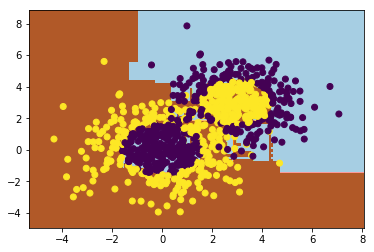

In [65]:
#  生成坐标轴范围
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#  根据两个线性序列的值生成坐标网格
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
#  对坐标网格中的所有数据都进行类别预测
Z = ada.predict(np.c_[xx.ravel(), yy.ravel()])
# 将预测结果变形成和xx相同的形状
Z = Z.reshape(xx.shape)
#  根据预测结果, 将两种不同的预测结果分别涂成两种不同的颜色
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
# 绘制原来的数据散点图
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.show()

In [17]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2,
        min_samples_split=20,min_samples_leaf=5),
                algorithm="SAMME",n_estimators=200, learning_rate=0.8)
bdt.fit(X, y)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.8, n_estimators=200, random_state=None)

这里我们选择了SAMME算法，最多200个弱分类器，步长0.8，在实际运用中你可能需要通过交叉验证调参而选择最好的参数。拟合完了后，我们用网格图来看看它拟合的区域。 

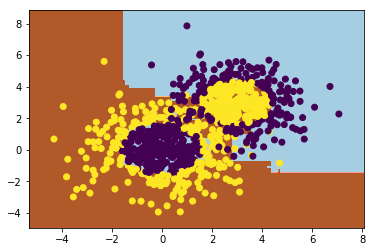

In [18]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.show()

从图中可以看出，Adaboost的拟合效果还是不错的，现在我们看看拟合分数： 

In [19]:
print("Score:"), bdt.score(X,y)

Score:


(None, 0.9133333333333333)

也就是说拟合训练集数据的分数还不错。当然分数高并不一定好，因为可能过拟合。 

现在我们将最大弱分离器个数从200增加到300。再来看看拟合分数。 

In [20]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),algorithm="SAMME", n_estimators=300, learning_rate=0.8)
bdt.fit(X, y)
print("Score:"), bdt.score(X,y)

Score:


(None, 0.9622222222222222)

这印证了我们前面讲的，弱分离器个数越多，则拟合程度越好，当然也越容易过拟合。 

现在我们降低步长，将步长从上面的0.8减少到0.5，再来看看拟合分数。 

In [21]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),algorithm="SAMME",n_estimators=300, learning_rate=0.5)
bdt.fit(X, y)
print("Score:"), bdt.score(X,y)

Score:


(None, 0.8944444444444445)

可见在同样的弱分类器的个数情况下，如果减少步长，拟合效果会下降。 

最后我们看看当弱分类器个数为700，步长为0.7时候的情况：

In [22]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),algorithm="SAMME",n_estimators=600, learning_rate=0.7)
bdt.fit(X, y)
print("Score:"), bdt.score(X,y)

Score:


(None, 0.9611111111111111)

此时的拟合分数和我们最初的300弱分类器，0.8步长的拟合程度相当。也就是说，在我们这个例子中，如果步长从0.8降到0.7，则弱分类器个数要从300增加到700才能达到类似的拟合效果。 